<a href="https://colab.research.google.com/github/wardasidd/MyDataScienceProjects/blob/main/Salary_Prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'salary-dataset-simple-linear-regression:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2799910%2F4832081%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240825%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240825T221358Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D90eb033970a561163d0472f0a1e1850b31daf8a9d9b8104d285467dff963aba263b53ff253a028e43c309d25ba1fb31a176bc3432c42c53734dbb8e09249c8a785fd56346cf811b5356185309664bec5156dc4061d0abe8e7b91120d125c0bfbd0ee658c4ef9dee32ea9864f42e58f395a4c3ff3a2c2066dade8ec3705736ff347f236696a74693bffca30a133b328f53cb2ff19fc077c5e07d8343d53991531a7dd134c75f89f954ef437ed6d0f9d226b602e68aa451b69a1a2ad8deda2825f45db59ed9a5d8a41ff56605cef89396bb30a22ae1cfd127f505593339f326b87d3fa70d8152984c8a00e6b5f2f7e1d1665e5eb709440fce74879f0935f026144'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 457 bytes downloaded
Downloaded and uncompressed: salary-dataset-simple-linear-regression
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [3]:
#Importing all important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objects as gb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df= pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")
print (df)

    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

In [5]:
#checking the non-null count along with datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [6]:
#checking for unique values to decide if we need to drop any column
df.nunique()

,0
Unnamed: 0,30
YearsExperience,28
Salary,30


In [7]:
#Visualizing the dataset properly
fig=ex.scatter(data_frame=df,x="YearsExperience",y="Salary",size="YearsExperience",trendline='ols')
fig.show()

In [8]:
#dropping the unnamed column that was used for indexing purpose
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
#checking the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
# Extracting features and target variable from the dataframe 'df'
# 'X' will contain all columns except the last one as features
# 'y' will contain the last column as the target variable
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
#splitting the data into train and test data
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#fitting the model
lr=LinearRegression().fit(X_train,y_train)
lr

LinearRegression()

In [13]:
#making predictions on Train and Test data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Mean Squared Error (MSE)

Mean Squared Error (MSE) is a common metric used for measuring the accuracy of a regression model. It calculates the average squared difference between the estimated values and the actual value.

# R² Score (Coefficient of Determination)

R² Score, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model.



In [14]:
#Determining the metrics for Linear Regression
train_rme=mean_squared_error(y_train,y_train_pred)
test_rme=mean_squared_error(y_test,y_test_pred)
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)
print(f"train_rme: {train_rme}\n"
      f"test_rme: {test_rme}\n"
      f"train_r2: {train_r2}\n"
      f"test_r2: {test_r2}")

train_rme: 27102249.73126133
test_rme: 49830096.855908394
train_r2: 0.9645401573418148
test_r2: 0.9024461774180497


In [15]:
# Create DataFrames for training and testing datasets
train_data = pd.DataFrame({'Actual': y_train.ravel(), 'Predicted': y_train_pred.ravel(), 'Dataset': 'Training'})
test_data = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_test_pred.ravel(), 'Dataset': 'Testing'})

# Concatenate both DataFrames
combined_data = pd.concat([train_data, test_data], ignore_index=True)

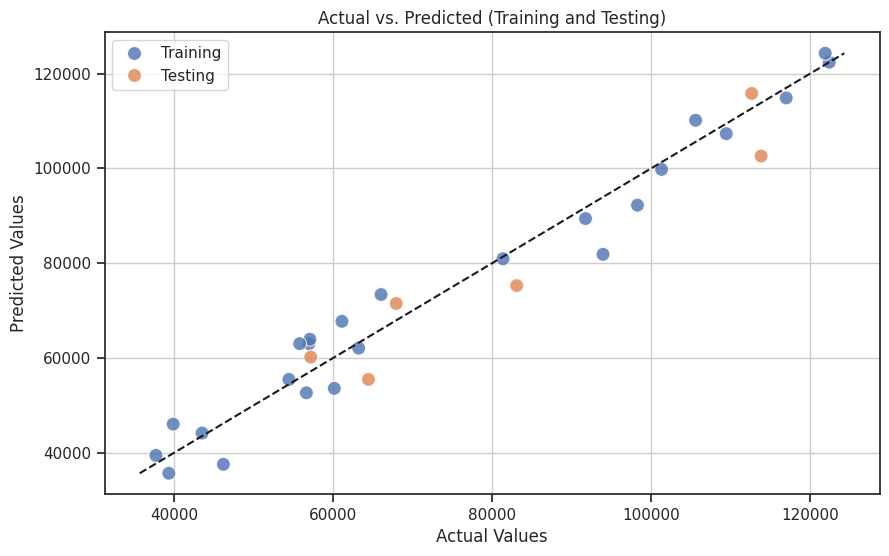

In [16]:
# Plot the results using Seaborn
sns.set(style='ticks')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Dataset', data=combined_data, s=100, alpha=0.8)
plt.plot([min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
         [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1], 'k--')
#labeling the axes
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training and Testing)')
plt.legend()
plt.grid(True)
plt.show()